In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 7.5)

import sklearn
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [ ]:
data_home = datasets.fetch_openml(name='credit-g')

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


In [ ]:
data_home

{'data':     checking_status  duration                  credit_history  \
 0                <0       6.0  critical/other existing credit   
 1          0<=X<200      48.0                   existing paid   
 2       no checking      12.0  critical/other existing credit   
 3                <0      42.0                   existing paid   
 4                <0      24.0              delayed previously   
 ..              ...       ...                             ...   
 995     no checking      12.0                   existing paid   
 996              <0      30.0                   existing paid   
 997     no checking      12.0                   existing paid   
 998              <0      45.0                   existing paid   
 999        0<=X<200      45.0  critical/other existing credit   
 
                  purpose  credit_amount    savings_status  employment  \
 0               radio/tv         1169.0  no known savings         >=7   
 1               radio/tv         5951.0          

In [ ]:
Predictors_home = data_home.get('data')
Target_home = data_home.get('target')

In [ ]:
Predictors_home.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [ ]:
Target_home.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['good', 'bad']

In [ ]:
print("Size of data table X", Predictors_home.shape)
print("Size of the response vector Y", Target_home.shape)

Size of data table X (1000, 20)
Size of the response vector Y (1000,)


In [ ]:
Predictors_home.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
dtype: int64

In [ ]:
Target_home.isna().sum()

0

In [ ]:
Predictors_home.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
unique_targets = list(set(Target_home))
Target_dict = dict(zip(unique_targets, range(len(unique_targets))))
Target = Target_home.replace(to_replace=unique_targets, value=list(Target_dict.values()))

In [ ]:
unique_targets

['bad', 'good']

In [ ]:
Predictors_home.shape

(1000, 20)

In [ ]:
Predictors_home.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
Predictors_dummies = pd.get_dummies(Predictors_home)
Predictors_dummies = Predictors_dummies[Predictors_dummies.columns].astype('category') # prefix=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 
                                                                                       #'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
                                                                                       # 'housing', 'job', 'own_telephone', 'foreign_worker'])
print(Predictors_dummies.describe())

        duration  credit_amount  installment_commitment  residence_since  \
count     1000.0         1000.0                  1000.0           1000.0   
unique      33.0          921.0                     4.0              4.0   
top         24.0         1275.0                     4.0              4.0   
freq       184.0            3.0                   476.0            413.0   

           age  existing_credits  num_dependents  checking_status_<0  \
count   1000.0            1000.0          1000.0                1000   
unique    53.0               4.0             2.0                   2   
top       27.0               1.0             1.0                   0   
freq      51.0             633.0           845.0                 726   

        checking_status_0<=X<200  checking_status_>=200  ...  housing_own  \
count                       1000                   1000  ...         1000   
unique                         2                      2  ...            2   
top                        

In [ ]:
Predictors_dummies = Predictors_dummies[Predictors_dummies.columns].astype('float')
print(Predictors_dummies.describe())

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  checking_status_<0  \
count  1000.000000       1000.000000     1000.000000         1000.000000   
mean     35.546000          1.407000        1.155000            0.274000   
std      11.375469          0.577654        0.362086            0.446

In [ ]:
Predictors_dummies

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_0<=X<200,checking_status_>=200,...,housing_own,housing_for free,job_unemp/unskilled non res,job_unskilled resident,job_skilled,job_high qualif/self emp/mgmt,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
test_ratio = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(Predictors_dummies, 
                                                    Target, 
                                                    test_size = test_ratio, 
                                                    random_state=123)

print(X_train.shape)
print(X_test.shape)

(800, 63)
(200, 63)


In [ ]:
Y_test

131    0
203    0
50     1
585    0
138    1
      ..
79     1
177    1
657    1
210    1
381    0
Name: class, Length: 200, dtype: int64

{'bad': 0, 'good': 1}


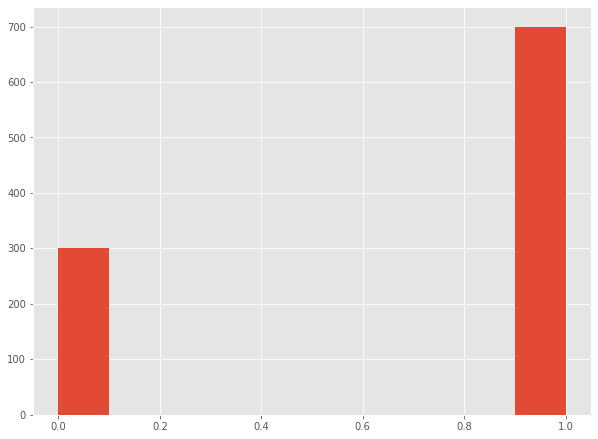

In [ ]:
plt.hist(Target)
print(Target_dict)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
model_logistic = LogisticRegressionCV(cv = 5)
model_logistic.fit(X_train, Y_train)
model_logistic.score(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.77375

In [ ]:
preds = model_logistic.predict(X_test)
confusion_matrix(Y_test, preds)

array([[ 37,  24],
       [ 19, 120]])

In [ ]:
print(classification_report(Y_test, preds, target_names = unique_targets))

              precision    recall  f1-score   support

         bad       0.66      0.61      0.63        61
        good       0.83      0.86      0.85       139

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200



In [ ]:
a = classification_report(Y_test, preds, target_names = unique_targets)

In [ ]:
index = a.find("macro avg")
output_macroavg = float(a[index+16:index+20])
if(output_macroavg >= 0.75):
  print("Test passed")
else:
  print("Test is not passed")

Test passed


# KNN (k-nearest neighbors method)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
number_of_neighbors = np.arange(3, 25, 2)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN, 
                           param_grid = params, cv = 6, scoring = "f1_macro")

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='f1_macro')

In [ ]:
grid_search.best_score_

0.5335039681576155

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds_knn = grid_search.predict(X_test)

In [ ]:
confusion_matrix(Y_test, preds_knn)

array([[ 18,  43],
       [ 32, 107]])

In [ ]:
print(classification_report(Y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.36      0.30      0.32        61
           1       0.71      0.77      0.74       139

    accuracy                           0.62       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.61      0.62      0.61       200



# SVM (support vector machine)

In [ ]:
from sklearn.svm import SVC
line_param = np.linspace(1, 20, 100)
parameters = {'kernel': ['rbf'], 'C':line_param}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv = 6)
grid_search_svm.fit(X_train, Y_train)
grid_search_svm.best_score_

0.7087588373919874

In [ ]:
grid_search_svm.best_estimator_

SVC(C=8.1010101010101)

In [ ]:
preds_svm = grid_search_svm.predict(X_test)

In [ ]:
confusion_matrix(Y_test, preds_svm)

array([[  6,  55],
       [  3, 136]])

In [ ]:
print(classification_report(Y_test, preds_svm, target_names = unique_targets))

              precision    recall  f1-score   support

         bad       0.67      0.10      0.17        61
        good       0.71      0.98      0.82       139

    accuracy                           0.71       200
   macro avg       0.69      0.54      0.50       200
weighted avg       0.70      0.71      0.63       200

